In [1]:
# Import required dependencies

import pandas as pd
pd.options.mode.chained_assignment=None  # default='warn'

from tqdm import tqdm
tqdm.pandas()

In [2]:
# Load sample DataFrame

sample_df = pd.read_csv('data/sample_emails.csv')
sample_df

,message_id,subject,content,n_words,clean_content,n_words_clean
0,<23119266.1075844369192.JavaMail.evans@thyme>,Re: ISO NY Zone A West,Dale:\n\nLooks okay -- I just made a few chang...,125,Dale:\n\nLooks okay I just made a few changes...,123
1,<32592935.1075840757928.JavaMail.evans@thyme>,All Types of Home Loans... Incredible Savings!...,Our Loan Packages Have Never Been More Attract...,137,Our Loan Packages Have Never Been More Attract...,137
2,<31344186.1075853679126.JavaMail.evans@thyme>,NaN,"Hi Chris, \n\nI just called you a while ago an...",123,"Hi Chris, \n\nI just called you a while ago an...",123
3,<17603763.1075862292350.JavaMail.evans@thyme>,"ROD , It's easy to subscribe!",<http://www.emaildelivery.net/getimage.asp?id=...,152,"Dear ROD ,\n\nYou have received this email bec...",147
4,<11709436.1075840470552.JavaMail.evans@thyme>,TRANSSTATUS 30939 CONFIRMED,Reservation status has changed to CONFIRMED. S...,176,Reservation status has changed to CONFIRMED. S...,120
...,...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,Opportunity to Attend Blazers Practice Thursda...,"FYI--\n \nSorry for the late notice, but our o...",287,"FYI\n \nSorry for the late notice, but our off...",113
996,<9742995.1075853136316.JavaMail.evans@thyme>,Action Requested: Invoice Requires Coding/Iss...,Please do not reply to this e-mail.\n\nYou are...,107,Please do not reply to this e-mail.\n\nYou are...,107
997,<4096488.1075860859833.JavaMail.evans@thyme>,WARNING: Your mailbox is approaching the size...,This warning is sent automatically to inform y...,125,This warning is sent automatically to inform y...,125
998,<8043554.1075842592751.JavaMail.evans@thyme>,Update: Contributions,If you would like to contribute to the fund fo...,350,If you would like to contribute to the fund fo...,106


In [3]:
# Replace NaN with empty string

sample_df = sample_df.fillna("")
sample_df

,message_id,subject,content,n_words,clean_content,n_words_clean
0,<23119266.1075844369192.JavaMail.evans@thyme>,Re: ISO NY Zone A West,Dale:\n\nLooks okay -- I just made a few chang...,125,Dale:\n\nLooks okay I just made a few changes...,123
1,<32592935.1075840757928.JavaMail.evans@thyme>,All Types of Home Loans... Incredible Savings!...,Our Loan Packages Have Never Been More Attract...,137,Our Loan Packages Have Never Been More Attract...,137
2,<31344186.1075853679126.JavaMail.evans@thyme>,,"Hi Chris, \n\nI just called you a while ago an...",123,"Hi Chris, \n\nI just called you a while ago an...",123
3,<17603763.1075862292350.JavaMail.evans@thyme>,"ROD , It's easy to subscribe!",<http://www.emaildelivery.net/getimage.asp?id=...,152,"Dear ROD ,\n\nYou have received this email bec...",147
4,<11709436.1075840470552.JavaMail.evans@thyme>,TRANSSTATUS 30939 CONFIRMED,Reservation status has changed to CONFIRMED. S...,176,Reservation status has changed to CONFIRMED. S...,120
...,...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,Opportunity to Attend Blazers Practice Thursda...,"FYI--\n \nSorry for the late notice, but our o...",287,"FYI\n \nSorry for the late notice, but our off...",113
996,<9742995.1075853136316.JavaMail.evans@thyme>,Action Requested: Invoice Requires Coding/Iss...,Please do not reply to this e-mail.\n\nYou are...,107,Please do not reply to this e-mail.\n\nYou are...,107
997,<4096488.1075860859833.JavaMail.evans@thyme>,WARNING: Your mailbox is approaching the size...,This warning is sent automatically to inform y...,125,This warning is sent automatically to inform y...,125
998,<8043554.1075842592751.JavaMail.evans@thyme>,Update: Contributions,If you would like to contribute to the fund fo...,350,If you would like to contribute to the fund fo...,106


In [4]:
# Load GPT-3 predictions DataFrame

pred_df = pd.read_csv('data/predictions.csv')
pred_df

,message_id,prediction
0,<23119266.1075844369192.JavaMail.evans@thyme>,"{\n ""persons"": [""Dale"", ""Leslie""],\..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,"{\n ""persons"": [],\n ""da..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"{\n ""persons"": [""Chris"", ""Hector""],..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"{\n ""persons"": [],\n ""da..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,"{\n ""persons"": [""Lisa Gang"", ""Bill ..."
...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"{\n ""persons"": [""Tina Tate"", ""Debra..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,"{\n ""persons"": [],\n ""da..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,"{\n ""persons"": [],\n ""da..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,"{\n ""persons"": [""Bob"", ""Becky""],\n ..."


In [5]:
# Merge dataframes by message_id 

df = sample_df.merge(pred_df, how='outer', left_on=['message_id'], right_on=['message_id'])
df

,message_id,subject,content,n_words,clean_content,n_words_clean,prediction
0,<23119266.1075844369192.JavaMail.evans@thyme>,Re: ISO NY Zone A West,Dale:\n\nLooks okay -- I just made a few chang...,125,Dale:\n\nLooks okay I just made a few changes...,123,"{\n ""persons"": [""Dale"", ""Leslie""],\..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,All Types of Home Loans... Incredible Savings!...,Our Loan Packages Have Never Been More Attract...,137,Our Loan Packages Have Never Been More Attract...,137,"{\n ""persons"": [],\n ""da..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,,"Hi Chris, \n\nI just called you a while ago an...",123,"Hi Chris, \n\nI just called you a while ago an...",123,"{\n ""persons"": [""Chris"", ""Hector""],..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"ROD , It's easy to subscribe!",<http://www.emaildelivery.net/getimage.asp?id=...,152,"Dear ROD ,\n\nYou have received this email bec...",147,"{\n ""persons"": [],\n ""da..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,TRANSSTATUS 30939 CONFIRMED,Reservation status has changed to CONFIRMED. S...,176,Reservation status has changed to CONFIRMED. S...,120,"{\n ""persons"": [""Lisa Gang"", ""Bill ..."
...,...,...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,Opportunity to Attend Blazers Practice Thursda...,"FYI--\n \nSorry for the late notice, but our o...",287,"FYI\n \nSorry for the late notice, but our off...",113,"{\n ""persons"": [""Tina Tate"", ""Debra..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Action Requested: Invoice Requires Coding/Iss...,Please do not reply to this e-mail.\n\nYou are...,107,Please do not reply to this e-mail.\n\nYou are...,107,"{\n ""persons"": [],\n ""da..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,WARNING: Your mailbox is approaching the size...,This warning is sent automatically to inform y...,125,This warning is sent automatically to inform y...,125,"{\n ""persons"": [],\n ""da..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,Update: Contributions,If you would like to contribute to the fund fo...,350,If you would like to contribute to the fund fo...,106,"{\n ""persons"": [""Bob"", ""Becky""],\n ..."


In [6]:
# Keep relevant column names

df = df[["message_id", "clean_content", "prediction"]]
df

,message_id,clean_content,prediction
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{\n ""persons"": [""Dale"", ""Leslie""],\..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{\n ""persons"": [],\n ""da..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{\n ""persons"": [""Chris"", ""Hector""],..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{\n ""persons"": [],\n ""da..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{\n ""persons"": [""Lisa Gang"", ""Bill ..."
...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{\n ""persons"": [""Tina Tate"", ""Debra..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{\n ""persons"": [],\n ""da..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{\n ""persons"": [],\n ""da..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{\n ""persons"": [""Bob"", ""Becky""],\n ..."


In [7]:
# Rename column clean_content to text

df.rename(columns={"clean_content": "text"}, inplace=True)
df

,message_id,text,prediction
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{\n ""persons"": [""Dale"", ""Leslie""],\..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{\n ""persons"": [],\n ""da..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{\n ""persons"": [""Chris"", ""Hector""],..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{\n ""persons"": [],\n ""da..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{\n ""persons"": [""Lisa Gang"", ""Bill ..."
...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{\n ""persons"": [""Tina Tate"", ""Debra..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{\n ""persons"": [],\n ""da..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{\n ""persons"": [],\n ""da..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{\n ""persons"": [""Bob"", ""Becky""],\n ..."


In [8]:
# Check sample 

sample_email = df['text'].iloc[0]
print(sample_email)

Dale:

Looks okay  I just made a few changes  I updated the reference the NYISO 
as the site publisher and also updated the location reference.  

ISO NY Zone A (West) Peak

The Floating Price during a Determination Period shall be the average of the 
hourly day-ahead prices listed in the Index (in final, not estimate, form) 
for electricity delivered during Peak hours on each Delivery Day during the 
applicable Determination Period.  The Floating Price for each Determination 
Period shall be calculated utilizing the hourly clearing prices published by 
the New York Independent System Operator on its official web site currently 
located at http://www.nyiso.com/oasis/index.html, or any successor thereto, 
under the headings "Day Ahead Market LBMP - Zonal; Zonal Prices; West 
(61752)"  (the "Index").


Leslie


In [9]:
sample_prediction = df['prediction'].iloc[0]
print(sample_prediction)

{
            "persons": ["Dale", "Leslie"],
            "dates": [],
            "locations": ["NYISO"],
            "organizations": [],
            "sentiment": "neutral"
         }


In [10]:
type(sample_prediction)

str

In [11]:
# Check how many predictions have error message

df[df["prediction"].str.contains("Error:")]

,message_id,text,prediction


In [12]:
import json

def to_dict(response):
    """
    Conver GPT-3 response to Python
    dictionary
    """
    
    try:
        if not response.startswith("{"):
            response = "{" + response + "}"
        
        response = json.loads(response)
    
    except json.JSONDecodeError as e:
        print("Invalid JSON syntax:", e)
        response = {}

    return response

In [13]:
# We'll convert the prediction response to Python dictionary data type

df["prediction"] = df["prediction"].progress_apply(lambda x: to_dict(x))
df

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 19196.87it/s]

Invalid JSON syntax: Invalid \escape: line 4 column 30 (char 136)


,message_id,text,prediction
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates..."
...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo..."


In [14]:
df.to_dict('records')[:5]

[{'message_id': '<23119266.1075844369192.JavaMail.evans@thyme>',
  'text': 'Dale:\n\nLooks okay  I just made a few changes  I updated the reference the NYISO \nas the site publisher and also updated the location reference.  \n\nISO NY Zone A (West) Peak\n\nThe Floating Price during a Determination Period shall be the average of the \nhourly day-ahead prices listed in the Index (in final, not estimate, form) \nfor electricity delivered during Peak hours on each Delivery Day during the \napplicable Determination Period.  The Floating Price for each Determination \nPeriod shall be calculated utilizing the hourly clearing prices published by \nthe New York Independent System Operator on its official web site currently \nlocated at http://www.nyiso.com/oasis/index.html, or any successor thereto, \nunder the headings "Day Ahead Market LBMP - Zonal; Zonal Prices; West \n(61752)"  (the "Index").\n\n\nLeslie',
  'prediction': {'persons': ['Dale', 'Leslie'],
   'dates': [],
   'locations': ['NYI

In [15]:
print(df['text'].iloc[0])

Dale:

Looks okay  I just made a few changes  I updated the reference the NYISO 
as the site publisher and also updated the location reference.  

ISO NY Zone A (West) Peak

The Floating Price during a Determination Period shall be the average of the 
hourly day-ahead prices listed in the Index (in final, not estimate, form) 
for electricity delivered during Peak hours on each Delivery Day during the 
applicable Determination Period.  The Floating Price for each Determination 
Period shall be calculated utilizing the hourly clearing prices published by 
the New York Independent System Operator on its official web site currently 
located at http://www.nyiso.com/oasis/index.html, or any successor thereto, 
under the headings "Day Ahead Market LBMP - Zonal; Zonal Prices; West 
(61752)"  (the "Index").


Leslie


In [16]:
df['prediction'].iloc[0]

{'persons': ['Dale', 'Leslie'],
 'dates': [],
 'locations': ['NYISO'],
 'organizations': [],
 'sentiment': 'neutral'}

In [17]:
# Create utility function to extract named entities

def extract_entities(response):
    """
    Extract named entities
    """
    entities = []
    if 'persons' in response:
        persons = response['persons']
        if persons:
            for person in persons:
                entity = {}
                entity['word'] = person
                entity['tag'] = 'PERSON'
                entities.append(entity)
    
    if 'dates' in response:
        dates = response['dates']
        if dates:
            for date in dates:
                entity = {}
                entity['word'] = date
                entity['tag'] = 'DATE'
                entities.append(entity)
                
    if 'locations' in response:
        locations = response['locations']
        if locations:
            for location in locations:
                entity = {}
                entity['word'] = location
                entity['tag'] = 'LOCATION'
                entities.append(entity)
                
    if 'organizations' in response:
        organizations = response['organizations']
        if organizations:
            for organization in organizations:
                entity = {}
                entity['word'] = organization
                entity['tag'] = 'ORG'
                entities.append(entity)
                
    return entities

In [18]:
extract_entities(df['prediction'].iloc[0])

[{'word': 'Dale', 'tag': 'PERSON'},
 {'word': 'Leslie', 'tag': 'PERSON'},
 {'word': 'NYISO', 'tag': 'LOCATION'}]

In [19]:
# Create utility function to extract sentiment label

def extract_sentiment(response):
    """
    Extract sentiment label
    """
    sentiment = ""
    if 'sentiment' in response:
        sentiment = response['sentiment']
    return sentiment

In [20]:
extract_sentiment(df['prediction'].iloc[0])

'neutral'

In [21]:
# Extract list of entities
df['entities'] = df["prediction"].progress_apply(lambda x: extract_entities(x))

# Extract sentiment label
df['sentiment'] = df["prediction"].progress_apply(lambda x: extract_sentiment(x))
df

100%|███████████████████████████████████| 1000/1000 [00:00<00:00, 525272.89it/s]


,message_id,text,prediction,entities,sentiment
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...",neutral
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[],positive
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...",positive
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...",neutral
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...",neutral
...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...",neutral
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...",neutral
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[],neutral
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...",positive


### Named Entity Recognition (NER)

In [22]:
# Create copy of dataframe and use it for NER task

ner_df = df.copy()
ner_df

,message_id,text,prediction,entities,sentiment
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...",neutral
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[],positive
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...",positive
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...",neutral
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...",neutral
...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...",neutral
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...",neutral
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[],neutral
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...",positive


In [23]:
# Drop column 'sentiment'

ner_df.drop(columns=["sentiment"], inplace=True)
ner_df

,message_id,text,prediction,entities
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '..."
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor..."
...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'..."
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B..."


In [24]:
# Drop records where no prediction

ner_df[ner_df["entities"].str.len() == 0]

,message_id,text,prediction,entities
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
65,<30005438.1075852929371.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
66,<7063394.1075841396120.JavaMail.evans@thyme>,take this home for your kids\n\n\n\n**********...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
73,<21065380.1075846674108.JavaMail.evans@thyme>,L O V E H O R O S C O P E \n+ \n \nSagitt...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
110,<25946868.1075859123632.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
126,<18011448.1075854982754.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
157,<33211298.1075840979739.JavaMail.evans@thyme>,All the software you need to burn your own DVD...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
207,<27483442.1075852321175.JavaMail.evans@thyme>,"18:23:00 Synchronizing Mailbox 'Nemec, Gerald'...","{'persons': [], 'dates': [], 'locations': [], ...",[]
208,<22491296.1075858858139.JavaMail.evans@thyme>,Save up to 75% on Term Life Insurance Get FRE...,"{'persons': [], 'dates': [], 'locations': [], ...",[]
211,<29417499.1075858678469.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[]


In [25]:
ner_df = ner_df[ner_df["entities"].str.len() != 0]
ner_df

,message_id,text,prediction,entities
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T..."
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor..."
5,<1581542.1075842436127.JavaMail.evans@thyme>,What are some legal issues we should be aware ...,"{'persons': ['EdChang', 'Sylvia Hu'], 'dates':...","[{'word': 'EdChang', 'tag': 'PERSON'}, {'word'..."
...,...,...,...,...
994,<27137131.1075860883651.JavaMail.evans@thyme>,Attached is the land use category and constrai...,"{'persons': ['Jon Alstad', 'Scott J. Patti'], ...","[{'word': 'Jon Alstad', 'tag': 'PERSON'}, {'wo..."
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B..."


In [26]:
def to_tuples(entities):
    """
    Convert list of entities
    to tuples
    """
    entities = [
        (x["word"], x["tag"])
            for x in entities
    ]
    return entities

In [27]:
sample_entities = ner_df["entities"].iloc[0]
print(sample_entities)

[{'word': 'Dale', 'tag': 'PERSON'}, {'word': 'Leslie', 'tag': 'PERSON'}, {'word': 'NYISO', 'tag': 'LOCATION'}]


In [28]:
to_tuples(sample_entities)

[('Dale', 'PERSON'), ('Leslie', 'PERSON'), ('NYISO', 'LOCATION')]

In [29]:
ner_df["annotation"] = ner_df["entities"].progress_apply(lambda x: to_tuples(x))
ner_df

100%|█████████████████████████████████████| 960/960 [00:00<00:00, 217485.79it/s]


,message_id,text,prediction,entities,annotation
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...","[(Dale, PERSON), (Leslie, PERSON), (NYISO, LOC..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...","[(Chris, PERSON), (Hector, PERSON), (New York,..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...","[(Platts, ORG), (The McGraw Hill Companies, ORG)]"
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...","[(Lisa Gang, PERSON), (Bill Rust, PERSON), (06..."
5,<1581542.1075842436127.JavaMail.evans@thyme>,What are some legal issues we should be aware ...,"{'persons': ['EdChang', 'Sylvia Hu'], 'dates':...","[{'word': 'EdChang', 'tag': 'PERSON'}, {'word'...","[(EdChang, PERSON), (Sylvia Hu, PERSON), (Tues..."
...,...,...,...,...,...
994,<27137131.1075860883651.JavaMail.evans@thyme>,Attached is the land use category and constrai...,"{'persons': ['Jon Alstad', 'Scott J. Patti'], ...","[{'word': 'Jon Alstad', 'tag': 'PERSON'}, {'wo...","[(Jon Alstad, PERSON), (Scott J. Patti, PERSON..."
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...","[(Tina Tate, PERSON), (Debra Davidson, PERSON)..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...","[(iBuyit Payables, ORG), (iBuyitPayables, ORG)..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...","[(Bob, PERSON), (Becky, PERSON), (Enron, ORG)]"


In [30]:
annotation_lst = ner_df["annotation"].tolist()
annotations = [item for sublist in annotation_lst for item in sublist]
annotations[:5]

[('Dale', 'PERSON'),
 ('Leslie', 'PERSON'),
 ('NYISO', 'LOCATION'),
 ('Chris', 'PERSON'),
 ('Hector', 'PERSON')]

In [31]:
annot_df = pd.DataFrame(annotations, columns=['word', 'label'])
annot_df

,word,label
0,Dale,PERSON
1,Leslie,PERSON
2,NYISO,LOCATION
3,Chris,PERSON
4,Hector,PERSON
...,...,...
5367,Enron,ORG
5368,John Morris,PERSON
5369,Thursday afternoon,DATE
5370,"Washington, DC",LOCATION


In [32]:
annot_df["label"].value_counts()

PERSON      2337
ORG         1411
DATE         874
LOCATION     750
Name: label, dtype: int64

In [33]:
entity_stats = annot_df['label'].value_counts().rename_axis('label').reset_index(name='count')
entity_stats

,label,count
0,PERSON,2337
1,ORG,1411
2,DATE,874
3,LOCATION,750


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

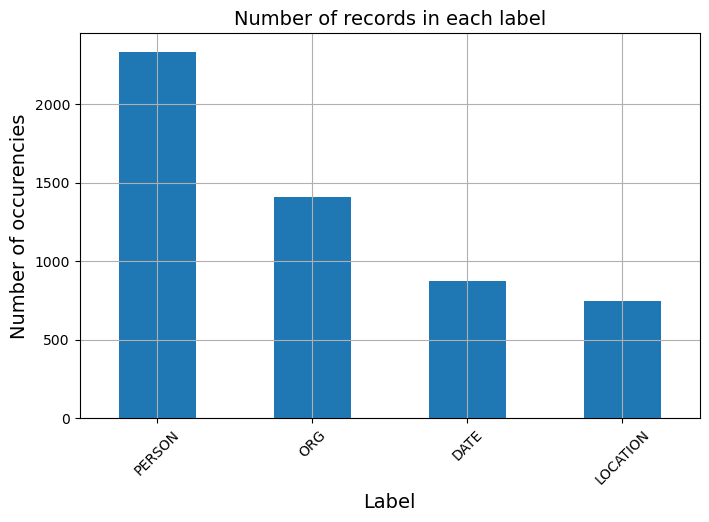

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
entity_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Number of records in each label", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

In [35]:
ner_df

,message_id,text,prediction,entities,annotation
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...","[(Dale, PERSON), (Leslie, PERSON), (NYISO, LOC..."
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...","[(Chris, PERSON), (Hector, PERSON), (New York,..."
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...","[(Platts, ORG), (The McGraw Hill Companies, ORG)]"
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...","[(Lisa Gang, PERSON), (Bill Rust, PERSON), (06..."
5,<1581542.1075842436127.JavaMail.evans@thyme>,What are some legal issues we should be aware ...,"{'persons': ['EdChang', 'Sylvia Hu'], 'dates':...","[{'word': 'EdChang', 'tag': 'PERSON'}, {'word'...","[(EdChang, PERSON), (Sylvia Hu, PERSON), (Tues..."
...,...,...,...,...,...
994,<27137131.1075860883651.JavaMail.evans@thyme>,Attached is the land use category and constrai...,"{'persons': ['Jon Alstad', 'Scott J. Patti'], ...","[{'word': 'Jon Alstad', 'tag': 'PERSON'}, {'wo...","[(Jon Alstad, PERSON), (Scott J. Patti, PERSON..."
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...","[(Tina Tate, PERSON), (Debra Davidson, PERSON)..."
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...","[(iBuyit Payables, ORG), (iBuyitPayables, ORG)..."
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...","[(Bob, PERSON), (Becky, PERSON), (Enron, ORG)]"


In [36]:
from sklearn.model_selection import train_test_split

# Split dataset into train 80%, and 20% as validation & test
train, temp = train_test_split(
    ner_df, train_size=0.80, random_state=42
)

# Generate validation, test from temporary dataframe
val, test = train_test_split(
    temp, test_size=0.5, random_state=42
)

In [37]:
len(train), len(val), len(test)

(768, 96, 96)

In [38]:
train

,message_id,text,prediction,entities,annotation
316,<11792830.1075859955495.JavaMail.evans@thyme>,Good catch. NY law should apply throughout th...,"{'persons': ['Leonardo Pacheco'], 'dates': [],...","[{'word': 'Leonardo Pacheco', 'tag': 'PERSON'}...","[(Leonardo Pacheco, PERSON), (NY, LOCATION), (..."
485,<16461482.1075846947944.JavaMail.evans@thyme>,"Tana,\nWow, you are really on the ball. Looks...","{'persons': ['Tana', 'Matthias', 'Karin', 'Ste...","[{'word': 'Tana', 'tag': 'PERSON'}, {'word': '...","[(Tana, PERSON), (Matthias, PERSON), (Karin, P..."
308,<27347038.1075842439828.JavaMail.evans@thyme>,I am very pleased to announce that L.D. Stephe...,"{'persons': ['L.D. Stephens', 'Enron', 'John D...","[{'word': 'L.D. Stephens', 'tag': 'PERSON'}, {...","[(L.D. Stephens, PERSON), (Enron, PERSON), (Jo..."
568,<22015863.1075844739388.JavaMail.evans@thyme>,"Chris:\n\nWe should chat. Per the ISDA, ENA i...","{'persons': ['Chris H Foster', 'Sara Shackleto...","[{'word': 'Chris H Foster', 'tag': 'PERSON'}, ...","[(Chris H Foster, PERSON), (Sara Shackleton, P..."
483,<27358009.1075862249772.JavaMail.evans@thyme>,I have made additional changes on pages 11-12 ...,"{'persons': ['Mark Mayer', 'BPA', 'Dick O'Niel...","[{'word': 'Mark Mayer', 'tag': 'PERSON'}, {'wo...","[(Mark Mayer, PERSON), (BPA, PERSON), (Dick O'..."
...,...,...,...,...,...
111,<23887193.1075840960293.JavaMail.evans@thyme>,We plan to have a conference call at 2pm Sunda...,"{'persons': ['David', 'Tammie', 'John', 'Louis...","[{'word': 'David', 'tag': 'PERSON'}, {'word': ...","[(David, PERSON), (Tammie, PERSON), (John, PER..."
284,<12852426.1075844351646.JavaMail.evans@thyme>,Attached in WordPerfect are blacklines of the ...,"{'persons': ['Deborah Lowe'], 'dates': [], 'lo...","[{'word': 'Deborah Lowe', 'tag': 'PERSON'}, {'...","[(Deborah Lowe, PERSON), (1717 Main Street, Su..."
892,<685271.1075852754266.JavaMail.evans@thyme>,We intend to start officializing a gas book fo...,"{'persons': ['Kathy', 'McKay'], 'dates': ['Jul...","[{'word': 'Kathy', 'tag': 'PERSON'}, {'word': ...","[(Kathy, PERSON), (McKay, PERSON), (July 3rd, ..."
453,<3384182.1075849303276.JavaMail.evans@thyme>,We are very close to sending out a redline.? A...,"{'persons': ['Linda Y. Sherif'], 'dates': [], ...","[{'word': 'Linda Y. Sherif', 'tag': 'PERSON'},...","[(Linda Y. Sherif, PERSON), (120 Montgomery St..."


In [39]:
val

,message_id,text,prediction,entities,annotation
659,<18050053.1075859962876.JavaMail.evans@thyme>,"Al:\n\nPer my voice mail, I have left a messag...","{'persons': ['Al', 'Mark', 'Alfred Pennisi'], ...","[{'word': 'Al', 'tag': 'PERSON'}, {'word': 'Ma...","[(Al, PERSON), (Mark, PERSON), (Alfred Pennisi..."
397,<31623156.1075845089208.JavaMail.evans@thyme>,"To all,\n\nI visited with Kam earlier today to...","{'persons': ['Kam', 'Pete', 'Scott', 'LRC/Stri...","[{'word': 'Kam', 'tag': 'PERSON'}, {'word': 'P...","[(Kam, PERSON), (Pete, PERSON), (Scott, PERSON..."
820,<24135778.1075846138474.JavaMail.evans@thyme>,"Beth, Mark - \n\nI think we are ready to move ...","{'persons': ['Beth', 'Mark', 'Steve Woods', 'H...","[{'word': 'Beth', 'tag': 'PERSON'}, {'word': '...","[(Beth, PERSON), (Mark, PERSON), (Steve Woods,..."
480,<9457688.1075861461211.JavaMail.evans@thyme>,"Dear Jason Wolfe,\n\nWe are happy to inform yo...","{'persons': ['Jason Wolfe', 'Sergei'], 'dates'...","[{'word': 'Jason Wolfe', 'tag': 'PERSON'}, {'w...","[(Jason Wolfe, PERSON), (Sergei, PERSON), (Oct..."
280,<26484226.1075855280232.JavaMail.evans@thyme>,Scheduling Issue:\t\n\n\t1024\tMIRANT(Rala) to...,"{'persons': ['Rala', 'Katherine', 'Russell', '...","[{'word': 'Rala', 'tag': 'PERSON'}, {'word': '...","[(Rala, PERSON), (Katherine, PERSON), (Russell..."
...,...,...,...,...,...
279,<10689485.1075851883019.JavaMail.evans@thyme>,"?\n?\n?\n?\n?\n?\n?\n?\nHi all, Merry Christma...","{'persons': ['Diane'], 'dates': ['Christmas', ...","[{'word': 'Diane', 'tag': 'PERSON'}, {'word': ...","[(Diane, PERSON), (Christmas, DATE), (New Year..."
604,<12019737.1075861047362.JavaMail.evans@thyme>,"March 13, 2002\nNotice No. NMS-22\n\n\nNOTICE ...","{'persons': ['Michael Cokeley', 'David Kimmel'...","[{'word': 'Michael Cokeley', 'tag': 'PERSON'},...","[(Michael Cokeley, PERSON), (David Kimmel, PER..."
537,<31192798.1075842099616.JavaMail.evans@thyme>,Steve:\nI am faxing you our remaining comments...,"{'persons': ['Steve', 'DB', 'Carol St. Clair']...","[{'word': 'Steve', 'tag': 'PERSON'}, {'word': ...","[(Steve, PERSON), (DB, PERSON), (Carol St. Cla..."
721,<28609896.1075861988637.JavaMail.evans@thyme>,"Mark,\n\nI spoke to the postmaster and she sta...","{'persons': ['Mark', 'Veronica'], 'dates': [],...","[{'word': 'Mark', 'tag': 'PERSON'}, {'word': '...","[(Mark, PERSON), (Veronica, PERSON)]"


In [40]:
test

,message_id,text,prediction,entities,annotation
983,<15886210.1075854965508.JavaMail.evans@thyme>,Allright fellas here's the gameplan . . . I'll...,"{'persons': ['Kevin A. Boone', 'Matt'], 'dates...","[{'word': 'Kevin A. Boone', 'tag': 'PERSON'}, ...","[(Kevin A. Boone, PERSON), (Matt, PERSON), (Ac..."
115,<17217905.1075853978006.JavaMail.evans@thyme>,"Tina,\nKoch never returned my calls. Based on ...","{'persons': ['Tina', 'Koch', 'Cyndie'], 'dates...","[{'word': 'Tina', 'tag': 'PERSON'}, {'word': '...","[(Tina, PERSON), (Koch, PERSON), (Cyndie, PERS..."
92,<28372483.1075843343800.JavaMail.evans@thyme>,I wanted to follow-up with everyone following ...,"{'persons': ['Steve M', 'Janine', 'Jeff', 'Roy...","[{'word': 'Steve M', 'tag': 'PERSON'}, {'word'...","[(Steve M, PERSON), (Janine, PERSON), (Jeff, P..."
382,<7553175.1075863444700.JavaMail.evans@thyme>,"Vince,\n\n I agree with you that it's a lesso...","{'persons': ['Vince', 'Frank'], 'dates': [], '...","[{'word': 'Vince', 'tag': 'PERSON'}, {'word': ...","[(Vince, PERSON), (Frank, PERSON), (Sacramento..."
744,<16687289.1075862330552.JavaMail.evans@thyme>,I trust everything is going well. Please let ...,"{'persons': [], 'dates': ['next Board meeting'...","[{'word': 'next Board meeting', 'tag': 'DATE'}...","[(next Board meeting, DATE), (2001, DATE), (De..."
...,...,...,...,...,...
597,<17780105.1075840540168.JavaMail.evans@thyme>,"Heidi,\n\nI have no way of being able to discu...","{'persons': ['Heidi', 'Randall Chapman'], 'dat...","[{'word': 'Heidi', 'tag': 'PERSON'}, {'word': ...","[(Heidi, PERSON), (Randall Chapman, PERSON), (..."
784,<16492427.1075847631885.JavaMail.evans@thyme>,Teh rest of the parts for Phil's PC arrived to...,"{'persons': ['Phil', 'Kathy', 'Alan', 'Timothy...","[{'word': 'Phil', 'tag': 'PERSON'}, {'word': '...","[(Phil, PERSON), (Kathy, PERSON), (Alan, PERSO..."
790,<11901989.1075844026014.JavaMail.evans@thyme>,Hey guys thanks a million for supporting the g...,"{'persons': [], 'dates': ['Next Wednesday Augu...","[{'word': 'Next Wednesday August 16th', 'tag':...","[(Next Wednesday August 16th, DATE), (41st flo..."
320,<17922592.1075839996237.JavaMail.evans@thyme>,"Keoni,\nI am not concerned with the improperly...","{'persons': ['Keoni', 'Bill'], 'dates': [], 'l...","[{'word': 'Keoni', 'tag': 'PERSON'}, {'word': ...","[(Keoni, PERSON), (Bill, PERSON), (CAISO, ORG)]"


In [41]:
# Keep only relevant column names message_id, text, entities, annotation

train = train[['message_id', 'text', 'entities', 'annotation']]
val = val[['message_id', 'text', 'entities', 'annotation']]
test = test[['message_id', 'text', 'entities', 'annotation']]

In [42]:
train

,message_id,text,entities,annotation
316,<11792830.1075859955495.JavaMail.evans@thyme>,Good catch. NY law should apply throughout th...,"[{'word': 'Leonardo Pacheco', 'tag': 'PERSON'}...","[(Leonardo Pacheco, PERSON), (NY, LOCATION), (..."
485,<16461482.1075846947944.JavaMail.evans@thyme>,"Tana,\nWow, you are really on the ball. Looks...","[{'word': 'Tana', 'tag': 'PERSON'}, {'word': '...","[(Tana, PERSON), (Matthias, PERSON), (Karin, P..."
308,<27347038.1075842439828.JavaMail.evans@thyme>,I am very pleased to announce that L.D. Stephe...,"[{'word': 'L.D. Stephens', 'tag': 'PERSON'}, {...","[(L.D. Stephens, PERSON), (Enron, PERSON), (Jo..."
568,<22015863.1075844739388.JavaMail.evans@thyme>,"Chris:\n\nWe should chat. Per the ISDA, ENA i...","[{'word': 'Chris H Foster', 'tag': 'PERSON'}, ...","[(Chris H Foster, PERSON), (Sara Shackleton, P..."
483,<27358009.1075862249772.JavaMail.evans@thyme>,I have made additional changes on pages 11-12 ...,"[{'word': 'Mark Mayer', 'tag': 'PERSON'}, {'wo...","[(Mark Mayer, PERSON), (BPA, PERSON), (Dick O'..."
...,...,...,...,...
111,<23887193.1075840960293.JavaMail.evans@thyme>,We plan to have a conference call at 2pm Sunda...,"[{'word': 'David', 'tag': 'PERSON'}, {'word': ...","[(David, PERSON), (Tammie, PERSON), (John, PER..."
284,<12852426.1075844351646.JavaMail.evans@thyme>,Attached in WordPerfect are blacklines of the ...,"[{'word': 'Deborah Lowe', 'tag': 'PERSON'}, {'...","[(Deborah Lowe, PERSON), (1717 Main Street, Su..."
892,<685271.1075852754266.JavaMail.evans@thyme>,We intend to start officializing a gas book fo...,"[{'word': 'Kathy', 'tag': 'PERSON'}, {'word': ...","[(Kathy, PERSON), (McKay, PERSON), (July 3rd, ..."
453,<3384182.1075849303276.JavaMail.evans@thyme>,We are very close to sending out a redline.? A...,"[{'word': 'Linda Y. Sherif', 'tag': 'PERSON'},...","[(Linda Y. Sherif, PERSON), (120 Montgomery St..."


In [43]:
val

,message_id,text,entities,annotation
659,<18050053.1075859962876.JavaMail.evans@thyme>,"Al:\n\nPer my voice mail, I have left a messag...","[{'word': 'Al', 'tag': 'PERSON'}, {'word': 'Ma...","[(Al, PERSON), (Mark, PERSON), (Alfred Pennisi..."
397,<31623156.1075845089208.JavaMail.evans@thyme>,"To all,\n\nI visited with Kam earlier today to...","[{'word': 'Kam', 'tag': 'PERSON'}, {'word': 'P...","[(Kam, PERSON), (Pete, PERSON), (Scott, PERSON..."
820,<24135778.1075846138474.JavaMail.evans@thyme>,"Beth, Mark - \n\nI think we are ready to move ...","[{'word': 'Beth', 'tag': 'PERSON'}, {'word': '...","[(Beth, PERSON), (Mark, PERSON), (Steve Woods,..."
480,<9457688.1075861461211.JavaMail.evans@thyme>,"Dear Jason Wolfe,\n\nWe are happy to inform yo...","[{'word': 'Jason Wolfe', 'tag': 'PERSON'}, {'w...","[(Jason Wolfe, PERSON), (Sergei, PERSON), (Oct..."
280,<26484226.1075855280232.JavaMail.evans@thyme>,Scheduling Issue:\t\n\n\t1024\tMIRANT(Rala) to...,"[{'word': 'Rala', 'tag': 'PERSON'}, {'word': '...","[(Rala, PERSON), (Katherine, PERSON), (Russell..."
...,...,...,...,...
279,<10689485.1075851883019.JavaMail.evans@thyme>,"?\n?\n?\n?\n?\n?\n?\n?\nHi all, Merry Christma...","[{'word': 'Diane', 'tag': 'PERSON'}, {'word': ...","[(Diane, PERSON), (Christmas, DATE), (New Year..."
604,<12019737.1075861047362.JavaMail.evans@thyme>,"March 13, 2002\nNotice No. NMS-22\n\n\nNOTICE ...","[{'word': 'Michael Cokeley', 'tag': 'PERSON'},...","[(Michael Cokeley, PERSON), (David Kimmel, PER..."
537,<31192798.1075842099616.JavaMail.evans@thyme>,Steve:\nI am faxing you our remaining comments...,"[{'word': 'Steve', 'tag': 'PERSON'}, {'word': ...","[(Steve, PERSON), (DB, PERSON), (Carol St. Cla..."
721,<28609896.1075861988637.JavaMail.evans@thyme>,"Mark,\n\nI spoke to the postmaster and she sta...","[{'word': 'Mark', 'tag': 'PERSON'}, {'word': '...","[(Mark, PERSON), (Veronica, PERSON)]"


In [44]:
test

,message_id,text,entities,annotation
983,<15886210.1075854965508.JavaMail.evans@thyme>,Allright fellas here's the gameplan . . . I'll...,"[{'word': 'Kevin A. Boone', 'tag': 'PERSON'}, ...","[(Kevin A. Boone, PERSON), (Matt, PERSON), (Ac..."
115,<17217905.1075853978006.JavaMail.evans@thyme>,"Tina,\nKoch never returned my calls. Based on ...","[{'word': 'Tina', 'tag': 'PERSON'}, {'word': '...","[(Tina, PERSON), (Koch, PERSON), (Cyndie, PERS..."
92,<28372483.1075843343800.JavaMail.evans@thyme>,I wanted to follow-up with everyone following ...,"[{'word': 'Steve M', 'tag': 'PERSON'}, {'word'...","[(Steve M, PERSON), (Janine, PERSON), (Jeff, P..."
382,<7553175.1075863444700.JavaMail.evans@thyme>,"Vince,\n\n I agree with you that it's a lesso...","[{'word': 'Vince', 'tag': 'PERSON'}, {'word': ...","[(Vince, PERSON), (Frank, PERSON), (Sacramento..."
744,<16687289.1075862330552.JavaMail.evans@thyme>,I trust everything is going well. Please let ...,"[{'word': 'next Board meeting', 'tag': 'DATE'}...","[(next Board meeting, DATE), (2001, DATE), (De..."
...,...,...,...,...
597,<17780105.1075840540168.JavaMail.evans@thyme>,"Heidi,\n\nI have no way of being able to discu...","[{'word': 'Heidi', 'tag': 'PERSON'}, {'word': ...","[(Heidi, PERSON), (Randall Chapman, PERSON), (..."
784,<16492427.1075847631885.JavaMail.evans@thyme>,Teh rest of the parts for Phil's PC arrived to...,"[{'word': 'Phil', 'tag': 'PERSON'}, {'word': '...","[(Phil, PERSON), (Kathy, PERSON), (Alan, PERSO..."
790,<11901989.1075844026014.JavaMail.evans@thyme>,Hey guys thanks a million for supporting the g...,"[{'word': 'Next Wednesday August 16th', 'tag':...","[(Next Wednesday August 16th, DATE), (41st flo..."
320,<17922592.1075839996237.JavaMail.evans@thyme>,"Keoni,\nI am not concerned with the improperly...","[{'word': 'Keoni', 'tag': 'PERSON'}, {'word': ...","[(Keoni, PERSON), (Bill, PERSON), (CAISO, ORG)]"


In [46]:
# Save to .csv file format

train.to_csv('data/ner/train.csv', index=False)
val.to_csv('data/ner/val.csv', index=False)
test.to_csv('data/ner/test.csv', index=False)

### Converting data to IOB format

In [47]:
from difflib import SequenceMatcher
import re
import pickle

def matcher(string, pattern):
    '''
    Return the start and end index of any pattern present in the text.
    '''
    match_list = []
    pattern = pattern.strip()
    seqMatch = SequenceMatcher(None, string, pattern, autojunk=False)
    match = seqMatch.find_longest_match(0, len(string), 0, len(pattern))
    if (match.size == len(pattern)):
        start = match.a
        end = match.a + match.size
        match_tup = (start, end)
        string = string.replace(pattern, "X" * len(pattern), 1)
        match_list.append(match_tup)
        
    return match_list, string

def mark_sentence(s, match_list):
    '''
    Marks all the entities in the sentence as per the BIO scheme. 
    '''
    word_dict = {}
    for word in s.split():
        word_dict[word] = 'O'
        
    for start, end, e_type in match_list:
        temp_str = s[start:end]
        tmp_list = temp_str.split()
        if len(tmp_list) > 1:
            word_dict[tmp_list[0]] = 'B-' + e_type
            for w in tmp_list[1:]:
                word_dict[w] = 'I-' + e_type
        else:
            word_dict[temp_str] = 'B-' + e_type
    return word_dict

In [48]:
def isFound(substr, string):
    if (string.find(substr) == -1):
        return False
    return True

def clean(text):
    """
    Helper fuction to add a space before the punctuations.
    This is for better tokenization.
    """
    filters = ["!", "#", "$", "%", "&", "(", ")", "/", "*", ":", ";", "<", "=", ">", "?", "@", "[",
               "\\", "]", "_", "`", "{", "}", "~", "'", ","]
    for i in text:
        if i in filters:
            text = text.replace(i, " " + i)
    return text

def create_data(df):
    '''
    Function responsible for the creation of data
    '''
    data = []
    for text, annotation in zip(df.text, df.annotation):

        # Keep only entities that are found in text
        annotation = [
            entity for entity in annotation
                if isFound(entity[0], text)
        ]
        
        text = clean(text)
        text_ = text

        match_list = []
        for i in annotation:
            a, text_ = matcher(text, i[0])
            #match_list.append((a[0][0], a[0][1], i[1]))
            if a:
                match_list.append((a[0][0], a[0][1], i[1]))

        d = mark_sentence(text, match_list)
        data.append(d)
    
    return data

In [49]:
print(ner_df['text'].iloc[0])

Dale:

Looks okay  I just made a few changes  I updated the reference the NYISO 
as the site publisher and also updated the location reference.  

ISO NY Zone A (West) Peak

The Floating Price during a Determination Period shall be the average of the 
hourly day-ahead prices listed in the Index (in final, not estimate, form) 
for electricity delivered during Peak hours on each Delivery Day during the 
applicable Determination Period.  The Floating Price for each Determination 
Period shall be calculated utilizing the hourly clearing prices published by 
the New York Independent System Operator on its official web site currently 
located at http://www.nyiso.com/oasis/index.html, or any successor thereto, 
under the headings "Day Ahead Market LBMP - Zonal; Zonal Prices; West 
(61752)"  (the "Index").


Leslie


In [50]:
%pprint

create_data(ner_df[:1])

Pretty printing has been turned OFF


[{'Dale': 'B-PERSON', ':': 'O', 'Looks': 'O', 'okay': 'O', 'I': 'O', 'just': 'O', 'made': 'O', 'a': 'O', 'few': 'O', 'changes': 'O', 'updated': 'O', 'the': 'O', 'reference': 'O', 'NYISO': 'B-LOCATION', 'as': 'O', 'site': 'O', 'publisher': 'O', 'and': 'O', 'also': 'O', 'location': 'O', 'reference.': 'O', 'ISO': 'O', 'NY': 'O', 'Zone': 'O', 'A': 'O', '(West': 'O', ')': 'O', 'Peak': 'O', 'The': 'O', 'Floating': 'O', 'Price': 'O', 'during': 'O', 'Determination': 'O', 'Period': 'O', 'shall': 'O', 'be': 'O', 'average': 'O', 'of': 'O', 'hourly': 'O', 'day-ahead': 'O', 'prices': 'O', 'listed': 'O', 'in': 'O', 'Index': 'O', '(in': 'O', 'final': 'O', ',': 'O', 'not': 'O', 'estimate': 'O', 'form': 'O', 'for': 'O', 'electricity': 'O', 'delivered': 'O', 'hours': 'O', 'on': 'O', 'each': 'O', 'Delivery': 'O', 'Day': 'O', 'applicable': 'O', 'Period.': 'O', 'calculated': 'O', 'utilizing': 'O', 'clearing': 'O', 'published': 'O', 'by': 'O', 'New': 'O', 'York': 'O', 'Independent': 'O', 'System': 'O', 'Ope

In [51]:
# Convert train, test, val into IOB (Inside-Outside-Beginning) format 

train_ner_data = create_data(train)
val_ner_data = create_data(val)
test_ner_data = create_data(test)

len(train_ner_data), len(val_ner_data), len(test_ner_data)

(768, 96, 96)

In [52]:
train_ner_data[:2]

[{'Good': 'O', 'catch.': 'O', 'NY': 'B-LOCATION', 'law': 'O', 'should': 'O', 'apply': 'O', 'throughout': 'O', 'the': 'O', 'Americas': 'B-LOCATION', 'and': 'O', 'in': 'O', 'Japan.': 'O', 'We': 'O', 'used': 'O', 'UK': 'O', 'Europe': 'B-LOCATION', 'Singapore': 'B-LOCATION', 'on': 'O', 'theory': 'O', 'counterparties': 'O', 'there': 'O', 'would': 'O', 'be': 'O', 'more': 'O', 'comfortable': 'O', 'with': 'O', 'Uk': 'O', 'law.': 'O', 'I': 'O', "'m": 'O', 'not': 'O', 'sure': 'O', 'which': 'O', 'Australians': 'O', 'prefer.': 'O', 'What': 'O', 'do': 'O', 'you': 'O', 'think': 'O', 'of': 'O', 'following': 'O', ':': 'O', '16.': 'O', 'If': 'O', 'are': 'O', 'accessing': 'O', 'this': 'O', 'website': 'O', 'from': 'O', 'North': 'B-LOCATION', 'America': 'I-LOCATION', ',': 'O', 'South': 'B-LOCATION', 'or': 'O', 'Japan': 'B-LOCATION', 'terms': 'O', 'legal': 'O', 'Privacy': 'O', 'statement': 'O', 'shall': 'O', 'governed': 'O', 'by': 'O', 'laws': 'O', 'State': 'O', 'New': 'O', 'York': 'O', ';': 'O', 'if': 'O'

In [53]:
val_ner_data[:2]

[{'Al': 'B-PERSON', ':': 'O', 'Per': 'O', 'my': 'O', 'voice': 'O', 'mail': 'O', ',': 'O', 'I': 'O', 'have': 'O', 'left': 'O', 'a': 'O', 'message': 'O', 'for': 'O', 'Mark': 'B-PERSON', 'to': 'O', 'give': 'O', 'his': 'O', 'input.': 'O', 'think': 'O', 'you': 'O', 'should': 'O', 'revise': 'O', 'the': 'O', 'letter': 'O', 'as': 'O', 'follows': 'O', 'subject': 'O', "'s": 'O', 'edits': 'O', '"Please': 'O', 'be': 'O', 'advised': 'O', 'that': 'O', 'effective': 'O', 'July': 'O', '17': 'O', '2000': 'O', 'MGplc': 'B-ORG', 'was': 'O', 'aquired': 'O', 'by': 'O', 'Enron': 'B-ORG', 'group.': 'O', 'MG': 'B-ORG', 'London': 'I-ORG', 'Inc': 'I-ORG', 'part': 'O', 'of': 'O', 'Effective': 'O', 'October': 'O', '9': 'O', 'Inc.': 'O', 'changed': 'O', 'its': 'O', 'name': 'O', '"Enron': 'O', 'Trading': 'O', 'Services': 'O', 'Inc".': 'O', 'Also': 'O', 'please': 'O', 'Financial': 'O', 'Status': 'O', '(now': 'O', ')': 'O', 'has': 'O', 'not': 'O', 'changed.': 'O', 'If': 'O', 'there': 'O', 'are': 'O', 'any': 'O', 'ques

In [54]:
test_ner_data[:2]

[{'Allright': 'O', 'fellas': 'O', 'here': 'O', "'s": 'O', 'the': 'O', 'gameplan': 'O', '.': 'O', 'I': 'O', "'ll": 'O', 'drive': 'O', 'leave': 'O', 'at': 'O', '8am': 'O', 'tomorrow': 'O', 'morning': 'O', 'we': 'O', 'can': 'O', 'meet': 'O', 'my': 'O', 'house': 'O', 'or': 'O', 'Matt': 'B-PERSON', 'it': 'O', 'doesn': 'O', "'t": 'O', 'really': 'O', 'matter': 'O', 'to': 'O', 'me': 'O', 'plan': 'O', 'on': 'O', 'leaving': 'O', 'BR': 'O', 'no': 'O', 'later': 'O', 'than': 'O', '9am': 'O', 'sunday': 'O', 'morn': 'O', 'Geaux': 'O', 'Tigers': 'O', 'Regards': 'O', ',': 'O', 'Kevin': 'B-PERSON', 'A.': 'I-PERSON', 'Boone': 'I-PERSON', 'Accenture': 'B-ORG', 'Houston': 'O', 'Consultant': 'O', 'Energy': 'O', '(Octel': 'O', ')': 'O', '713.837.1638': 'O', '(Client': 'O', '281.848.1619': 'O', '(C': 'O', '713.306.7940': 'O', '(H': 'O', '713.864.4149': 'O', 'Kevin.A.Boone': 'O', '@accenture.com': 'O', 'Our': 'O', 'web': 'O', 'address': 'O', 'is': 'O', 'http': 'O', ':': 'O', '/': 'O', '/www.accenture.com': 'O'

In [55]:
def generate_word_label_dataset(data):
    """
    Generate word label DataFrame 
    """
    # Convert list of dicts to list of tuples
    tuple_lst = [[(k, v) for k, v in x.items()] for x in data]
    # Flatten list of list
    all_tuples = [item for sublist in tuple_lst for item in sublist]
    df = pd.DataFrame(all_tuples, columns=['word', 'label'])
    return df

In [56]:
ner_data = create_data(ner_df)
ner_data[:2]

[{'Dale': 'B-PERSON', ':': 'O', 'Looks': 'O', 'okay': 'O', 'I': 'O', 'just': 'O', 'made': 'O', 'a': 'O', 'few': 'O', 'changes': 'O', 'updated': 'O', 'the': 'O', 'reference': 'O', 'NYISO': 'B-LOCATION', 'as': 'O', 'site': 'O', 'publisher': 'O', 'and': 'O', 'also': 'O', 'location': 'O', 'reference.': 'O', 'ISO': 'O', 'NY': 'O', 'Zone': 'O', 'A': 'O', '(West': 'O', ')': 'O', 'Peak': 'O', 'The': 'O', 'Floating': 'O', 'Price': 'O', 'during': 'O', 'Determination': 'O', 'Period': 'O', 'shall': 'O', 'be': 'O', 'average': 'O', 'of': 'O', 'hourly': 'O', 'day-ahead': 'O', 'prices': 'O', 'listed': 'O', 'in': 'O', 'Index': 'O', '(in': 'O', 'final': 'O', ',': 'O', 'not': 'O', 'estimate': 'O', 'form': 'O', 'for': 'O', 'electricity': 'O', 'delivered': 'O', 'hours': 'O', 'on': 'O', 'each': 'O', 'Delivery': 'O', 'Day': 'O', 'applicable': 'O', 'Period.': 'O', 'calculated': 'O', 'utilizing': 'O', 'clearing': 'O', 'published': 'O', 'by': 'O', 'New': 'O', 'York': 'O', 'Independent': 'O', 'System': 'O', 'Ope

In [57]:
ner_ds = generate_word_label_dataset(ner_data)
ner_ds

,word,label
0,Dale,B-PERSON
1,:,O
2,Looks,O
3,okay,O
4,I,O
...,...,...
90927,Fax,O
90928,202.296.7138,O
90929,INGAA,O
90930,Proposal.doc,O


In [58]:
ner_stats = ner_ds.groupby('label').size().reset_index(name='count')
ner_stats

,label,count
0,B-DATE,438
1,B-LOCATION,594
2,B-ORG,1171
3,B-PERSON,2117
4,I-DATE,532
5,I-LOCATION,367
6,I-ORG,891
7,I-PERSON,1006
8,O,83816


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

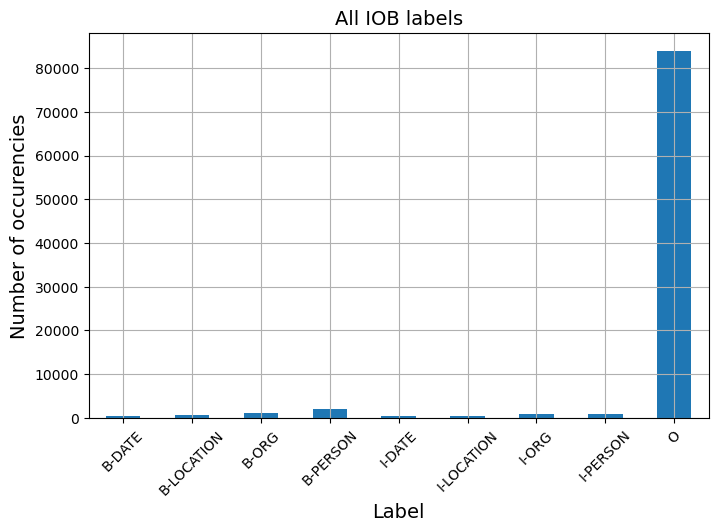

In [59]:
plt.figure(figsize=(15, 7))
ner_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("All IOB labels", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

In [60]:
# We'll exclude the 'O' token as it represents tokens that are not part of annotated labels

ner_stats = ner_stats[ner_stats['label'] != 'O']
ner_stats

,label,count
0,B-DATE,438
1,B-LOCATION,594
2,B-ORG,1171
3,B-PERSON,2117
4,I-DATE,532
5,I-LOCATION,367
6,I-ORG,891
7,I-PERSON,1006


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

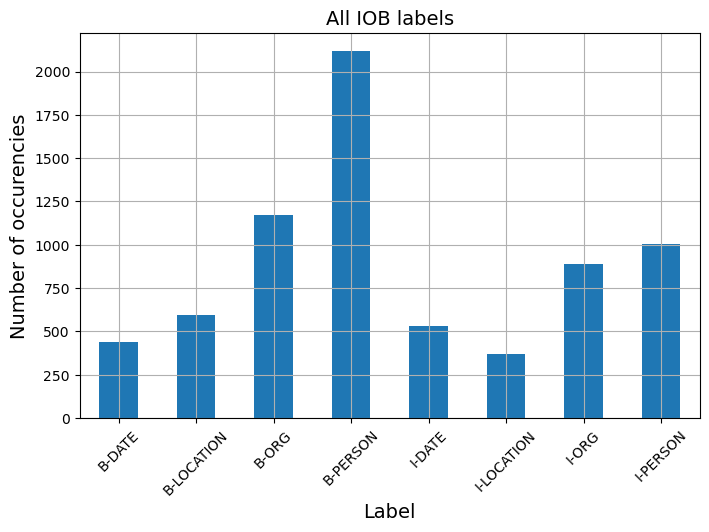

In [61]:
plt.figure(figsize=(15, 7))
ner_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("All IOB labels", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

### Train IOB labels

In [62]:
train_ds = generate_word_label_dataset(train_ner_data)
train_ds

,word,label
0,Good,O
1,catch.,O
2,NY,B-LOCATION
3,law,O
4,should,O
...,...,...
72855,voicemail.,O
72856,Thank,O
72857,you.,O
72858,Karen,B-PERSON


In [63]:
train_stats = train_ds.groupby('label').size().reset_index(name='count')
train_stats = train_stats[train_stats['label'] != 'O']
train_stats

,label,count
0,B-DATE,356
1,B-LOCATION,446
2,B-ORG,937
3,B-PERSON,1649
4,I-DATE,424
5,I-LOCATION,277
6,I-ORG,707
7,I-PERSON,811


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

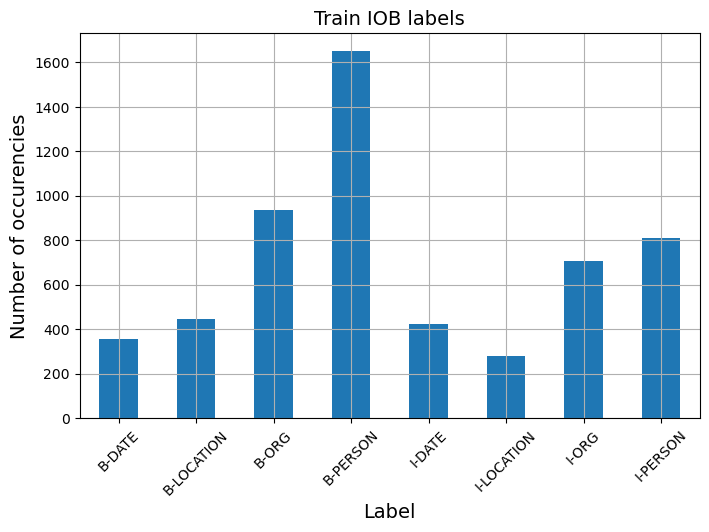

In [64]:
plt.figure(figsize=(15, 7))
train_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Train IOB labels", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

### Validation IOB labels

In [65]:
val_ds = generate_word_label_dataset(val_ner_data)
val_ds

,word,label
0,Al,B-PERSON
1,:,O
2,Per,O
3,my,O
4,voice,O
...,...,...
9077,database,O
9078,!,O
9079,!Unknown,O
9080,database.,O


In [66]:
val_stats = val_ds.groupby('label').size().reset_index(name='count')
val_stats = val_stats[val_stats['label'] != 'O']
val_stats

,label,count
0,B-DATE,33
1,B-LOCATION,70
2,B-ORG,102
3,B-PERSON,258
4,I-DATE,48
5,I-LOCATION,48
6,I-ORG,74
7,I-PERSON,108


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

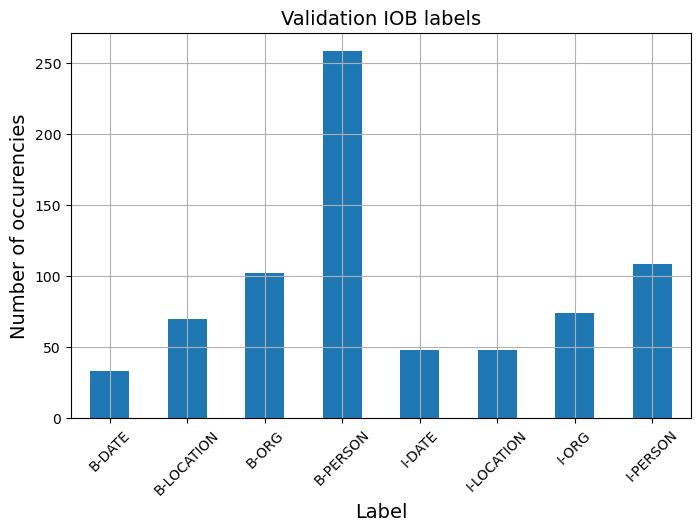

In [67]:
plt.figure(figsize=(15, 7))
val_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Validation IOB labels", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

### Test IOB labels

In [68]:
test_ds = generate_word_label_dataset(test_ner_data)
test_ds

,word,label
0,Allright,O
1,fellas,O
2,here,O
3,'s,O
4,the,O
...,...,...
8985,information,O
8986,was,O
8987,supplied,O
8988,me.,O


In [69]:
test_stats = test_ds.groupby('label').size().reset_index(name='count')
test_stats = test_stats[test_stats['label'] != 'O']
test_stats

,label,count
0,B-DATE,49
1,B-LOCATION,78
2,B-ORG,132
3,B-PERSON,210
4,I-DATE,60
5,I-LOCATION,42
6,I-ORG,110
7,I-PERSON,87


Text(0.5, 0, 'Label')

<Figure size 1500x700 with 0 Axes>

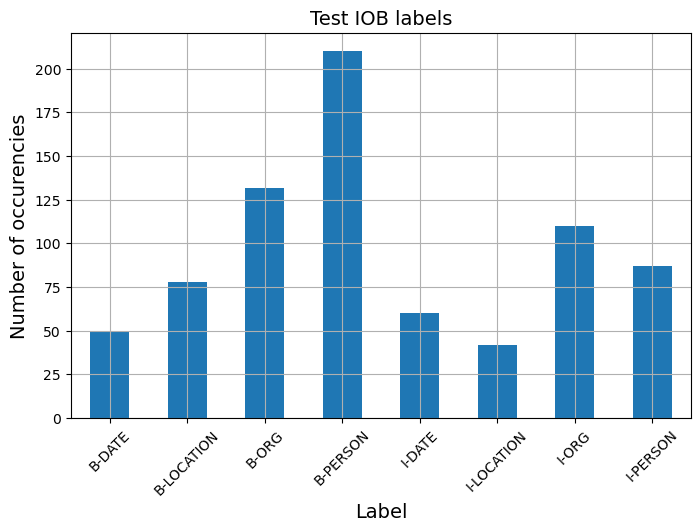

In [70]:
plt.figure(figsize=(15, 7))
test_stats.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Test IOB labels", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Label', fontsize=14)

In [72]:
train_ds

,word,label
0,Good,O
1,catch.,O
2,NY,B-LOCATION
3,law,O
4,should,O
...,...,...
72855,voicemail.,O
72856,Thank,O
72857,you.,O
72858,Karen,B-PERSON


In [73]:
val_ds

,word,label
0,Al,B-PERSON
1,:,O
2,Per,O
3,my,O
4,voice,O
...,...,...
9077,database,O
9078,!,O
9079,!Unknown,O
9080,database.,O


In [74]:
test_ds

,word,label
0,Allright,O
1,fellas,O
2,here,O
3,'s,O
4,the,O
...,...,...
8985,information,O
8986,was,O
8987,supplied,O
8988,me.,O


In [75]:
# Save to .csv file format

train_ds.to_csv('data/ner/train_word_label.csv', index=False)
val_ds.to_csv('data/ner/val_word_label.csv', index=False)
test_ds.to_csv('data/ner/test_word_label.csv', index=False)

### Sentiment Analysis

In [76]:
# Make a copy of sample DataFrame
sent_df = df.copy()
sent_df

,message_id,text,prediction,entities,sentiment
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...",neutral
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[],positive
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...",positive
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...",neutral
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...",neutral
...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...",neutral
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...",neutral
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[],neutral
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...",positive


In [77]:
sent_df['sentiment'].value_counts()

neutral     764
positive    169
negative     66
              1
Name: sentiment, dtype: int64

In [78]:
# It seems that one record was no labeled with the given sentiment, we will drop it.

sent_df = sent_df[sent_df['sentiment'] != ""]
sent_df

,message_id,text,prediction,entities,sentiment
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,"{'persons': ['Dale', 'Leslie'], 'dates': [], '...","[{'word': 'Dale', 'tag': 'PERSON'}, {'word': '...",neutral
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,"{'persons': [], 'dates': [], 'locations': [], ...",[],positive
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...","{'persons': ['Chris', 'Hector'], 'dates': [], ...","[{'word': 'Chris', 'tag': 'PERSON'}, {'word': ...",positive
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...","{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'Platts', 'tag': 'ORG'}, {'word': 'T...",neutral
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,"{'persons': ['Lisa Gang', 'Bill Rust'], 'dates...","[{'word': 'Lisa Gang', 'tag': 'PERSON'}, {'wor...",neutral
...,...,...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...","{'persons': ['Tina Tate', 'Debra Davidson'], '...","[{'word': 'Tina Tate', 'tag': 'PERSON'}, {'wor...",neutral
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,"{'persons': [], 'dates': [], 'locations': [], ...","[{'word': 'iBuyit Payables', 'tag': 'ORG'}, {'...",neutral
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,"{'persons': [], 'dates': [], 'locations': [], ...",[],neutral
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,"{'persons': ['Bob', 'Becky'], 'dates': [], 'lo...","[{'word': 'Bob', 'tag': 'PERSON'}, {'word': 'B...",positive


In [79]:
sent_df['sentiment'].value_counts()

neutral     764
positive    169
negative     66
Name: sentiment, dtype: int64

In [80]:
sent_stats = sent_df.groupby('sentiment').size().reset_index(name='count')
sent_stats

,sentiment,count
0,negative,66
1,neutral,764
2,positive,169


Text(0.5, 0, 'Sentiment')

<Figure size 1500x700 with 0 Axes>

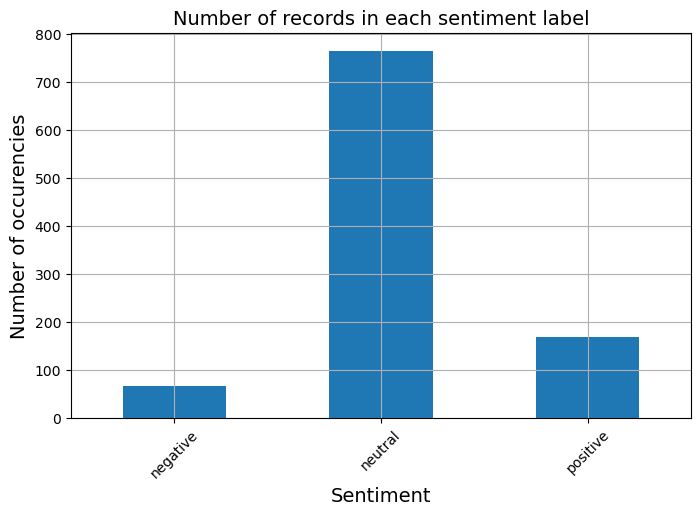

In [82]:
plt.figure(figsize=(15, 7))
sent_stats.plot(x='sentiment', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5), rot=45)
plt.title("Number of records in each sentiment label", fontsize=14)
plt.ylabel('Number of occurencies', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)

In [85]:
# Keep only relevant column names

sent_df = sent_df[['message_id', 'text', 'sentiment']]
sent_df

,message_id,text,sentiment
0,<23119266.1075844369192.JavaMail.evans@thyme>,Dale:\n\nLooks okay I just made a few changes...,neutral
1,<32592935.1075840757928.JavaMail.evans@thyme>,Our Loan Packages Have Never Been More Attract...,positive
2,<31344186.1075853679126.JavaMail.evans@thyme>,"Hi Chris, \n\nI just called you a while ago an...",positive
3,<17603763.1075862292350.JavaMail.evans@thyme>,"Dear ROD ,\n\nYou have received this email bec...",neutral
4,<11709436.1075840470552.JavaMail.evans@thyme>,Reservation status has changed to CONFIRMED. S...,neutral
...,...,...,...
995,<1741932.1075852143251.JavaMail.evans@thyme>,"FYI\n \nSorry for the late notice, but our off...",neutral
996,<9742995.1075853136316.JavaMail.evans@thyme>,Please do not reply to this e-mail.\n\nYou are...,neutral
997,<4096488.1075860859833.JavaMail.evans@thyme>,This warning is sent automatically to inform y...,neutral
998,<8043554.1075842592751.JavaMail.evans@thyme>,If you would like to contribute to the fund fo...,positive


In [86]:
# Save to .csv file format

sent_df.to_csv('data/sentiment/data.csv', index=False)